# Introduction to the JupyterLab and Jupyter Notebooks

This is a short introduction to two of the flagship tools created by [the Jupyter Community](https://jupyter.org).

> **⚠️Experimental!⚠️**: This is an experimental interface provided by the [JupyterLite project](https://jupyterlite.readthedocs.io/en/latest/). It embeds an entire JupyterLab interface, with many popular packages for scientific computing, in your browser. There may be minor differences in behavior between JupyterLite and the JupyterLab you install locally. You may also encounter some bugs or unexpected behavior. To report any issues, or to get involved with the JupyterLite project, see [the JupyterLite repository](https://github.com/jupyterlite/jupyterlite/issues?q=is%3Aissue+is%3Aopen+sort%3Aupdated-desc).

## JupyterLab 🧪

**JupyterLab** is a next-generation web-based user interface for Project Jupyter. It enables you to work with documents and activities such as Jupyter notebooks, text editors, terminals, and custom components in a flexible, integrated, and extensible manner. It is the interface that you're looking at right now.

**For an overview of the JupyterLab interface**, see the **JupyterLab Welcome Tour** on this page, by going to `Help -> Welcome Tour` and following the prompts.

> **See Also**: For a more in-depth tour of JupyterLab with a full environment that runs in the cloud, see [the JupyterLab introduction on Binder](https://mybinder.org/v2/gh/jupyterlab/jupyterlab-demo/HEAD?urlpath=lab/tree/demo).

## Jupyter Notebooks 📓

**Jupyter Notebooks** are a community standard for communicating and performing interactive computing. They are a document that blends computations, outputs, explanatory text, mathematics, images, and rich media representations of objects.

JupyterLab is one interface used to create and interact with Jupyter Notebooks.

**For an overview of Jupyter Notebooks**, see the **JupyterLab Welcome Tour** on this page, by going to `Help -> Notebook Tour` and following the prompts.

> **See Also**: For a more in-depth tour of Jupyter Notebooks and the Classic Jupyter Notebook interface, see [the Jupyter Notebook IPython tutorial on Binder](https://mybinder.org/v2/gh/ipython/ipython-in-depth/HEAD?urlpath=tree/binder/Index.ipynb).

## An example: visualizing data in the notebook ✨

Below is an example of a code cell. We'll visualize some simple data using two popular packages in Python. We'll use [NumPy](https://numpy.org/) to create some random data, and [Matplotlib](https://matplotlib.org) to visualize it.

Note how the code and the results of running the code are bundled together.

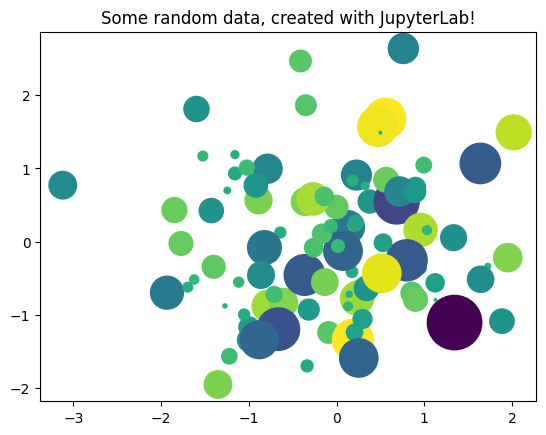

In [16]:
from matplotlib import pyplot as plt
import numpy as np

# Generate 100 random data points along 3 dimensions
x, y, scale = np.random.randn(3, 100)
fig, ax = plt.subplots()

# Map each onto a scatterplot we'll create with Matplotlib
ax.scatter(x=x, y=y, c=scale, s=np.abs(scale)*500)
ax.set(title="Some random data, created with JupyterLab!")
plt.show()

## Next steps 🏃

This is just a short introduction to JupyterLab and Jupyter Notebooks. See below for some more ways to interact with tools in the Jupyter ecosystem, and its community.

### Other notebooks in this demo

Here are some other notebooks in this demo. Each of the items below corresponds to a file or folder in the **file browser to the left**.

- [**`Lorenz.ipynb`**](Lorenz.ipynb) uses Python to demonstrate interactive visualizations and computations around the [Lorenz system](https://en.wikipedia.org/wiki/Lorenz_system). It shows off basic Python functionality, including more visualizations, data structures, and scientific computing libraries.
- [**`sqlite.ipynb`**](sqlite.ipynb) demonstrates how an in-browser sqlite kernel to run your own SQL commands from the notebook. It uses the [jupyterlite/xeus-sqlite-kernel](https://github.com/jupyterlite/xeus-sqlite-kernel).

### Other sources of information in Jupyter

- **More on using JupyterLab**: See [the JupyterLab documentation](https://jupyterlab.readthedocs.io/en/stable/) for more thorough information about how to install and use JupyterLab.
- **More interactive demos**: See [try.jupyter.org](https://try.jupyter.org) for more interactive demos with the Jupyter ecosystem.
- **Learn more about Jupyter**: See [the Jupyter community documentation](https://docs.jupyter.org) to learn more about the project, its community and tools, and how to get involved.
- **Join our discussions**: The [Jupyter Community Forum](https://discourse.jupyter.org) is a place where many in the Jupyter community ask questions, help one another, and discuss issues around interactive computing and our ecosystem.

In [17]:
# Decision Tree ID3 Algorithm
# The ID3 (Iterative Dichotomiser 3) algorithm is a decision tree algorithm that uses the concept of information gain to build the decision tree.

In [18]:
import math

In [19]:
# Step 1: Define the Node class for the decision tree
class Node:
    def __init__(self, attribute):
        self.attribute = attribute
        self.children = {}

In [28]:
# Step 2: Define the ID3 algorithm function
def id3(data, target_attribute, attributes):
    # Create a new node
    node = Node(None)

    # If all examples belong to the same class, return a leaf node with that class
    if len(set(data[target_attribute])) == 1:
        node.attribute = data[target_attribute].iloc[0]
        return node

    # If there are no more attributes to split on, return a leaf node with the majority class
    if len(attributes) == 0:
        node.attribute = data[target_attribute].value_counts().idxmax()
        return node

    # Calculate the information gain for each attribute
    info_gains = []
    for attribute in attributes:
        info_gain = calculate_information_gain(data, attribute, target_attribute)
        info_gains.append(info_gain)

    # Select the attribute with the highest information gain
    best_attribute_index = info_gains.index(max(info_gains))
    best_attribute = attributes[best_attribute_index]

    # Set the node's attribute to the best attribute
    node.attribute = best_attribute

    # Remove the best attribute from the list of attributes
    new_attributes = attributes.copy()
    new_attributes.remove(best_attribute)

    # Create a child node for each possible value of the best attribute
    for value in data[best_attribute].unique():
        subset = data[data[best_attribute] == value]
        if subset.empty:
            # If the subset is empty, create a leaf node with the majority class
            child_node = Node(data[target_attribute].value_counts().idxmax())
        else:
            # Recursively call the ID3 algorithm on the subset
            child_node = id3(subset, target_attribute, new_attributes)
        node.children[value] = child_node

    return node

In [21]:
# Step 3: Define the function to calculate information gain
def calculate_information_gain(data, attribute, target_attribute):
    # Calculate the entropy of the target attribute
    target_entropy = calculate_entropy(data[target_attribute])

    # Calculate the weighted average entropy of the attribute
    attribute_entropy = 0
    attribute_value_counts = data[attribute].value_counts()
    total_examples = len(data)
    for value, count in attribute_value_counts.items():
        subset = data[data[attribute] == value]
        subset_entropy = calculate_entropy(subset[target_attribute])
        attribute_entropy += (count/total_examples) * subset_entropy

    # Calculate the information gain
    information_gain = target_entropy - attribute_entropy

    return information_gain

# Step 4: Define the function to calculate entropy
def calculate_entropy(target_attribute):
    entropy = 0
    total_examples = len(target_attribute)
    class_counts = target_attribute.value_counts()
    for count in class_counts:
        probability = count / total_examples
        entropy -= probability * math.log2(probability)

    return entropy

In [22]:
# Step 4: Define the function to calculate entropy
def calculate_entropy(target_attribute):
    entropy = 0
    total_examples = len(target_attribute)
    class_counts = target_attribute.value_counts()
    for count in class_counts:
        probability = count / total_examples
        entropy -= probability * math.log2(probability)

    return entropy

In [23]:
# Step 5: Define the function to classify a new sample using the decision tree
def classify_sample(sample, decision_tree):
    # Traverse the decision tree until a leaf node is reached
    while decision_tree.children:
        attribute = decision_tree.attribute
        value = sample[attribute]
        if value not in decision_tree.children:
            # If the attribute value is not present in the decision tree, return None (unknown)
            return None
        decision_tree = decision_tree.children[value]

    # Return the class label of the leaf node
    return decision_tree.attribute

In [24]:
# Step 6: Prepare the dataset for the decision tree
# Here, I'm assuming a binary classification problem with the "PlayTennis" dataset
import pandas as pd

data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

In [25]:
# Step 7: Build the decision tree
target_attribute = 'PlayTennis'
attributes = ['Outlook', 'Temperature', 'Humidity', 'Wind']
decision_tree = id3(df, target_attribute, attributes)

In [26]:
# Step 8: Classify a new sample using the decision tree
new_sample = {
    'Outlook': 'Sunny',
    'Temperature': 'Cool',
    'Humidity': 'High',
    'Wind': 'Strong'
}

In [27]:
classification = classify_sample(new_sample, decision_tree)
print("Classification:", classification)

Classification: No
